In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [51]:
digits = load_digits()

In [52]:
("Image Data Shape", digits.data.shape)
("Label Data Shape", digits.target.shape)

('Label Data Shape', (1797,))

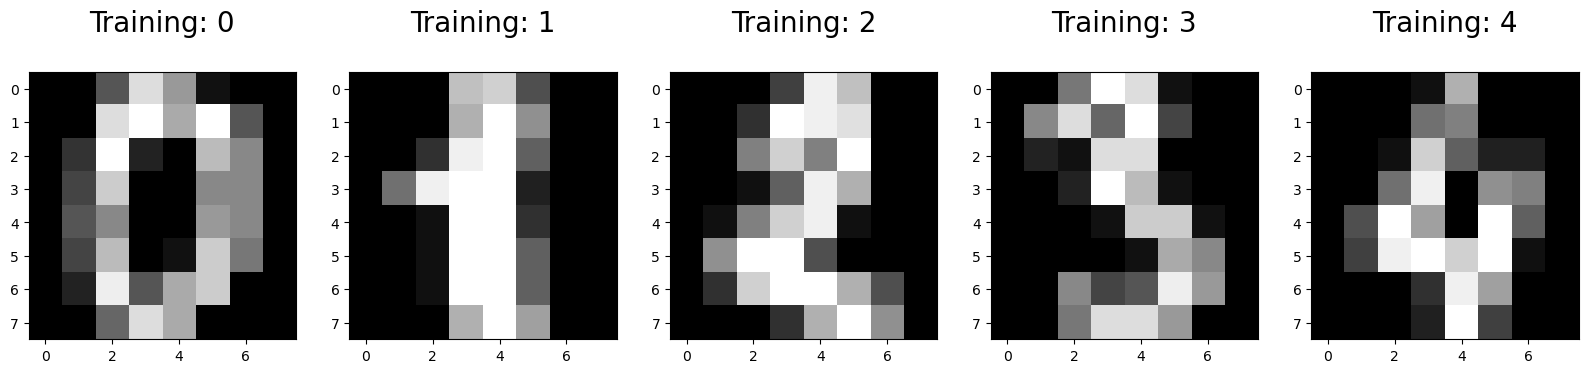

In [53]:
plt.figure(figsize=(20,4))
for idx, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize=20)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=2)

In [55]:
X_train.shape

(1257, 64)

In [56]:
X_test.shape

(540, 64)

In [57]:
y_train.shape

(1257,)

In [58]:
y_test.shape

(540,)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [66]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)

# logisticRegression = LogisticRegression(solver='liblinear')
# logisticRegression.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [67]:
pipe.predict(X_test[0].reshape(1,-1))

array([4])

In [68]:
pipe.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [88]:
predictions = pipe.predict(X_test)
predictions

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 1, 5, 7,
       9, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 8, 7, 9,
       3, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 8, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 5, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 7, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [76]:
score = pipe.score(X_test, y_test)
score

0.9481481481481482

In [89]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 57,  0,  2,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  1,  3,  1],
       [ 0,  1,  0,  0,  1, 56,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 54,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  1,  1, 39]], dtype=int64)

In [86]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidth=.5, square=True, cmap='Blues_r', xticklabels=range(10), yticklabels=range(10));
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score: {0}'.format(score);
plt.title(all_sample_title, size=15)
plt.show()

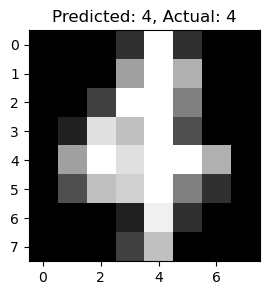

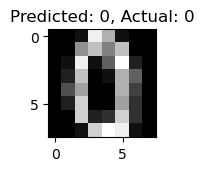

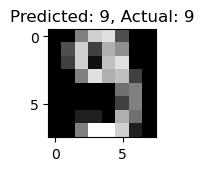

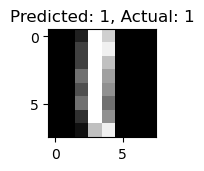

In [92]:
index = 0
classifiedIndex = []
for predicted, actual in zip(predictions, y_test):
    if predicted==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong], font_size=20))
    plt.show()